## [第4章 形態素解析](https://nlp100.github.io/ja/ch04.html)
結果だけ載せました。正解かどうかは保障しません笑

### github
- githubのjupyter notebook形式のファイルは[こちら](https://github.com/hiroshi0530/wa/blob/master/src/ml/nlp100/02/02_nb.ipynb)

### 筆者の環境

In [1]:
!sw_vers

ProductName:	Mac OS X
ProductVersion:	10.14.6
BuildVersion:	18G95


In [2]:
!python -V

Python 3.5.5 :: Anaconda, Inc.


In [3]:
!bash --version

GNU bash, version 3.2.57(1)-release (x86_64-apple-darwin18)
Copyright (C) 2007 Free Software Foundation, Inc.


### 共通部分

In [4]:
import MeCab
import re
import collections

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import matplotlib.pyplot as plt
import japanize_matplotlib

### データのダウンロード

In [5]:
!wget https://nlp100.github.io/data/neko.txt -O ./neko.txt

--2020-04-22 13:13:03--  https://nlp100.github.io/data/neko.txt
nlp100.github.io (nlp100.github.io) をDNSに問いあわせています... 185.199.111.153, 185.199.108.153, 185.199.109.153, ...
nlp100.github.io (nlp100.github.io)|185.199.111.153|:443 に接続しています... 接続しました。
HTTP による接続要求を送信しました、応答を待っています... 200 OK
長さ: 965825 (943K) [text/plain]
`./neko.txt' に保存中

./neko.txt          100%[===================>] 943.19K  --.-KB/s 時間 0.1s       

2020-04-22 13:13:04 (8.75 MB/s) - `./neko.txt' へ保存完了 [965825/965825]



In [6]:
in_file_name = './neko.txt'
out_file_name = './neko.txt.mecab'

In [7]:
mecab= MeCab.Tagger()

with open(in_file_name, mode='r') as f:
  n = mecab.parse(f.read())
  with open(out_file_name, mode='w') as f1:
    f1.write(n)

### 30問 形態素解析結果の読み込み
最終的に1分の形態素のリストのリストとなるようにします。

In [8]:
!head -n 5 $out_file_name

一	名詞,数,*,*,*,*,一,イチ,イチ
　	記号,空白,*,*,*,*,　,　,　
吾輩	名詞,代名詞,一般,*,*,*,吾輩,ワガハイ,ワガハイ
は	助詞,係助詞,*,*,*,*,は,ハ,ワ
猫	名詞,一般,*,*,*,*,猫,ネコ,ネコ


In [9]:
!tail -n 5 $out_file_name

。	記号,句点,*,*,*,*,。,。,。
ありがたい	形容詞,自立,*,*,形容詞・アウオ段,基本形,ありがたい,アリガタイ,アリガタイ
ありがたい	形容詞,自立,*,*,形容詞・アウオ段,基本形,ありがたい,アリガタイ,アリガタイ
。	記号,句点,*,*,*,*,。,。,。
EOS


最後の一行は除外します。

In [10]:
sentence_list = []

with open(out_file_name, mode='r') as f:
  temp = []
  for s in f.readlines()[:-1]:
    s1 = s.split('\t')
    s2 = s1[1].split(',')
    _dic = {
      'surface': s1[0],
      'base': s2[6],
      'pos': s2[0],
      'pos1': s2[1],
    }
    
    temp.append(_dic)
    
    if s1[0] == '。':
      sentence_list.append(temp)
      temp = []

### 31問 動詞

In [11]:
result = []
for sentence in sentence_list:
  for _dic in sentence:
    if _dic['pos'] == '動詞':
      result.append(_dic['surface'])

print(set(result))

{'れれ', '切り刻ん', '抜き', '見当り', '罷り', '剥げる', 'わる', '流行り', '問う', '心付く', '落す', '調子づく', '失わ', 'たくっ', 'かかわら', '押しやり', '容れ', '据える', '能い', '払い', '掛り', '雇う', '這い出そ', '探し', '止め', '覚める', '撲っ', '禁じ', '聞える', 'しきら', '執っ', '過ごす', 'づく', '鳴かせる', 'やっ', '上がん', '下る', '突か', 'とまり', '変り', 'なくなる', '恐れ入っ', '痛め', '有り', 'つく', '試みよ', '舞っ', 'ねじ伏せる', '笑わ', '遺す', '試し', '跳ね', 'こびりつい', '心掛け', '落とし', '欠く', 'つか', '喰っ', '取る', '聞き及び', '救い出し', '渡り', '掻く', '臨む', '飛びつき', '透かし', '疲れる', 'て', 'ふう', 'ぼっ', '見抜い', 'あるか', '略する', 'とまる', '使い', '助け', '捨て', '残し', '焚き', '断わっ', '輝い', '磨き', '帰さ', '重んじ', '沿う', '称する', '逸する', 'こす', 'いやがれ', '離れる', '防ぐ', '打つ', '似', '払う', '問い返さ', '焼か', '供える', '求め', '出来ん', '渋り', '出', '抛り出さ', '悟る', '吸取り', '捕り', '抓ん', '命じ', '着こなし', '打ち明ける', '舐め', '浮き', '結い', 'のび', '棄てる', 'いらせられ', '暮さ', '注ぎ', '残る', '乗り越え', '睡ら', 'なさろ', '解せ', '取り扱っ', '捻る', '罵り', '驚かす', '逢い', '鼓する', '競っ', '写し', '寄せ', 'くっ', '浮べ', 'すわ', '繙け', '懸かっ', 'わかっ', 'いける', '費やし', '書きつけ', '切っ', '見ろ', '怒鳴る', '御し', '出掛け', '納め', '欠き', 'やろ', '掻ける', 'やむを得', '触る', 'もたし',

### 32問 動詞の原形

In [12]:
result = []
for sentence in sentence_list:
  for _dic in sentence:
    if _dic['pos'] == '動詞':
      result.append(_dic['base'])

print(set(result))

{'引きずる', 'わる', '剥げる', '問う', '心付く', '落す', '調子づく', 'たなびく', '据える', 'くだる', '雇う', '跳ねのける', '覚める', '思いつく', '聞える', '飲める', '過ごす', '接す', '忌み嫌う', 'づく', '引き立つ', '鳴かせる', 'ふるえる', '転がれる', '下る', 'なくなる', '留る', 'かざる', 'つく', 'つくばう', 'ねむる', 'ねじ伏せる', '遺す', '図る', '泊る', '吹き払う', 'うめる', '欠く', 'つかまる', '取る', 'ずれる', '掻く', '臨む', '疲れる', '洩れる', 'うてる', 'ふう', '略する', 'とまる', '持ち切る', 'まじる', '縛り付ける', '伸す', '挟まる', '引っ掻く', '沿う', '称する', '逸する', 'こす', '離れる', '防ぐ', '打つ', '払う', 'じみる', '供える', '悟る', '懲らしめる', '交ぜる', '打ち明ける', '括る', '棄てる', 'まかる', '残る', '唸る', 'つぶやく', '捻る', '凝る', '載っける', '驚かす', '鼓する', '寝かす', '使いこなせる', '吸う', '透す', 'いける', '怒鳴る', 'のめる', '掻ける', '触る', '探す', '詰まる', 'ぬくもる', 'かかる', 'かきつける', '出直す', 'じゃらす', '平伏す', '叩き付ける', 'まわる', '急き込む', '写す', '稼ぐ', '弁ずる', 'かかえる', '要する', '振り落とす', '垂らす', '飲み込む', '沈む', '吐き出す', '見合せる', '掻きむしる', '砕く', '借りる', '取りつく', 'たらす', '足りる', '遠ざかる', '埋る', '混ぜる', 'ほのめく', '世帯染みる', 'たれる', '思いやる', '思い出す', 'たくる', '癒せる', '祈る', '拗じる', '因る', '突っ伏す', 'かわす', '引き続く', '押し込む', '見離す', '戻す', 'いやす', '着く', '思い付く', '浮く', '押しかける

### 33問 「AのB」

In [13]:
result = []
for sentence in sentence_list:
  if len(sentence) >= 3:
    for i, _dic in enumerate(sentence[1:-1]):
      if _dic['base'] == 'の' and \
         sentence[i-1+1]['pos'] == '名詞' and \
         sentence[i+1+1]['pos'] == '名詞' :
        result.append(sentence[i-1+1]['base'])
        result.append(sentence[i+1+1]['base'])

print(set(result))

{'満山', '孔明', 'わる', '舞台', '旧暦', '隅田川', '御作', '臥竜', '鮑', 'あばた', '懐中', '勧工場', '消息', '払い', '御国', '盛', '至当', 'レンズ', 'ご存じ', '軍鶏', '洋服', '不断', '益', '中止', '現代', '一身上', '隅', '鼎坐', '液体', 'ふみ', '一流', '紋', '週間', '平', '羽織', '崎', '乱入', '光', '勧誘', '厄介', '近火', '利益', '無能力', '要求', '下', '戸棚', '車屋', '医者', '盤', '草履', '頭領', '同盟', '黒白', '学校', '双眸', '肴', '脚本', '川', '縄暖簾', '娼家', '腹', '両人', '巻煙草', '県', '漆喰', '後', '罪人', '名誉', '留守', '紀', '身元', '柱時計', '質', '安眠', '戦争', '諾否', '打', '門前', '出任せ', '助け', '心配', '四角', '雲', '無念', '縮緬', '女連', '足跡', '平家', '不審', '以上', '逡巡', '麦藁', '平凡', '部分', '阿弥', '右', '苦しまぎれ', '帯', '座', '碁', 'ジャム', '席', '奥さん', '赤蛙', '息女', '主意', '革命', '絵', '衛門', '内', '堤', '暮', '苦', '盛徳', '定石', '麺', '装飾', '木彫', '耳', '探偵', '啓', '群小', '長時間', '身の丈', '旻', '建仁寺', '鼠賊', '覚悟', '相当', '大根卸', '渋柿', '崇高', '股', '櫃', '家内', 'ひま', '食物', '山羊', '断腸', '吟', '希望', '私有', '世話物', '神様', '幼少', '老若', '平生', 'こちら', '業務', '書物', '名簿', '立場', '咽喉', '入口', '狂', '無上', '想像', '布団', '八百屋', '孑孑', '虎', '相違', '寺内', '間隔', '廂', '築山', '果敢', '死目', '罪悪', '

### 34問 名詞の連接

In [14]:
result = []
temp_list = []
for sentence in sentence_list:
  temp_01 = list(map(lambda x: x['surface'] if x['pos'] == '名詞' else "", sentence))
  temp_02 = list(map(lambda x: 'a' if x['pos'] == '名詞' else 'b', sentence))
  
  a = ''.join(temp_02)
  temp_03 = list(re.sub('(aa+)','c' * len('\\1'),a))
  
  b = []
  t = '' 
  for i,j in zip(temp_01, temp_03):
    if j == 'c':
      t += i
    else:
      b.append(t)
      t = '' 
  
  result.extend(list(filter(lambda x: x != '',b)))
 
print(result)

['人間中', '一番獰悪', '時妙', '一毛', 'その後猫', '一度', 'ぷうぷうと煙', '邸内', '三毛', '書生以外', '四五', 'この間おさん', '三馬', '御台所', 'まま奥', '住家', '終日書斎', '勉強家', '勉強家', '勤勉家', '二三', '主人以外', '限り吾輩', '朝主人', '一番心持', '二人', '一つ床', '一人', '最後大変', '——猫', '神経胃弱', '物指', '尻ぺたをひどく', '言語同断', '家内総', '筋向', '白君', '度毎', '白君', '先日玉', '四疋', '三日', '四', '白君', '我等', '三毛', '所有', '我々同族', '目', '一番', '彼等人間', '我等', '吾人', '白君', '三毛', 'いくら人間', '間違いだらけ', '後架先生', '宗盛', '宗盛', '月給日', '水彩絵具', '毎日毎日', '人の', '自ら筆', '眼鏡越', '一室内', '以太利', '大家アンドレア・デル・サルト', '露華', '寒鴉', 'これ一', '活', '翌日吾輩', '一分', '辛棒', '今吾輩', '今吾輩', '波斯産', 'ただ一', '上不思議', '盲猫', '心中ひそか', 'いくらアンドレア・デル・サルト', '一分', 'あと大', '壊わし', '馬鹿野郎', '馬鹿野郎', '辛棒', '馬鹿野郎', '平生吾輩', '馬鹿野郎', '元来人間', 'みんな増長', '先どこ', '数倍', '十坪', '腹加減', '穏かな', '二', '吾輩', '後', '一本', '西側', '猫', '庭内', '忍び入り', '黒猫', '柔毛', '出ずる', '猫中', '杉垣', '二三', 'ぐべき力', '険呑', '時吾輩', '言葉付', '誰だい', '乱暴猫', '同盟敬遠', '一体車', '大分強', 'おれなん', '茶畠', '箆棒', 'あら', 'その後吾輩', '車屋相当', '不徳事件', '日例', '茶畠', '何匹', '元来黒', '近付', '事彼', '手柄話', '欠所', '三四', '二百', '一人', '何鼠', 'こん畜生'

### 35問 単語の出現頻度
単語の品詞は何なのかわかりませんが、ここは、名詞、動詞、形容詞に限定します。多い10個の単語を表示しています。

In [15]:
result_list = []
for sentence in sentence_list:
  for w in sentence:
    if w['pos'] in ['名詞','動詞','形容詞']:
      result_list.append(w['surface'])
    
for w in sorted(collections.Counter(result_list).items(), key=lambda x:x[1], reverse=True)[0:10]:
  print(w)

('し', 2265)
('の', 1611)
('いる', 1251)
('事', 1207)
('する', 998)
('もの', 981)
('君', 973)
('云う', 937)
('主人', 932)
('ない', 765)


### 36問 頻度上位10語

<BarContainer object of 10 artists>

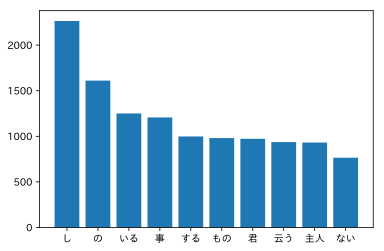

In [16]:
result_list = []
for sentence in sentence_list:
  for w in sentence:
    if w['pos'] in ['名詞','動詞','形容詞']:
      result_list.append(w['surface'])
    
x = list(map(lambda x:x[0],sorted(collections.Counter(result_list).items(), key=lambda x:x[1], reverse=True)[0:10]))
y = list(map(lambda x:x[1],sorted(collections.Counter(result_list).items(), key=lambda x:x[1], reverse=True)[0:10]))

plt.bar(x,y)

### 37問 「猫」と共起頻度の高い上位10語
猫を含む文章から、そこに含まれる単語を抽出します。ここでは名詞と限定しています。

<BarContainer object of 10 artists>

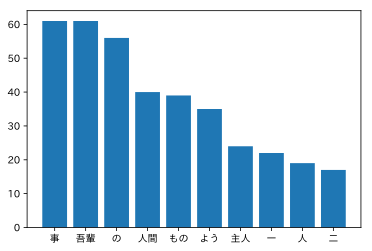

In [17]:
result_list = []
for sentence in sentence_list:
  if '猫' in list(map(lambda x:x['surface'], sentence)):
    for w in sentence:
      if w['pos'] in ['名詞'] and w['surface'] != '猫':
        result_list.append(w['surface'])
    
x = list(map(lambda x:x[0],sorted(collections.Counter(result_list).items(), key=lambda x:x[1], reverse=True)[0:10]))
y = list(map(lambda x:x[1],sorted(collections.Counter(result_list).items(), key=lambda x:x[1], reverse=True)[0:10]))

plt.bar(x,y)

### 38問 ヒストグラム
出現頻度の高い上位20までを表示しています。

<BarContainer object of 20 artists>

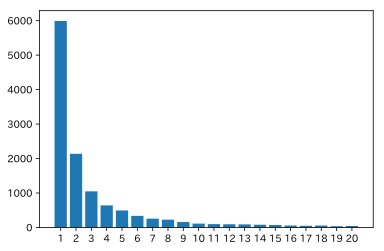

In [18]:
result_list = []
for sentence in sentence_list:
  for w in sentence:
    if w['pos'] in ['名詞','動詞','形容詞']:
      result_list.append(w['surface'])

hist_dic = collections.Counter(list(map(lambda x:x[1],sorted(collections.Counter(result_list).items(), key=lambda x:x[1], reverse=True))))

x = list(map(lambda x:str(x[0]),hist_dic.items()))[0:20]
y = list(map(lambda x:x[1],hist_dic.items()))[0:20]

plt.bar(x,y)

### 39問 Zipfの法則

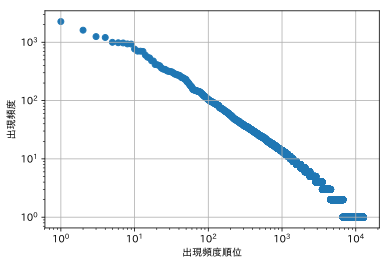

In [19]:
result_list = []
for sentence in sentence_list:
  for w in sentence:
    if w['pos'] in ['名詞','動詞','形容詞']:
      result_list.append(w['surface'])

sorted_list = sorted(collections.Counter(result_list).items(), key=lambda x:x[1], reverse=True)

x = list(range(1,len(sorted_list) + 1))
y = list(map(lambda x:x[1],sorted_list))

plt.grid()
plt.xscale('log')
plt.yscale('log')
plt.xlabel('出現頻度順位')
plt.ylabel('出現頻度')
plt.scatter(x,y)

## 関連記事
- [第1章 準備運動](/ml/nlp100/01/)
- [第2章 UNIXコマンド](/ml/nlp100/02/)
- [第3章 正規表現](/ml/nlp100/03/)
- [第4章 形態素解析](/ml/nlp100/04/)
- [第5章 係り受け解析](/ml/nlp100/05/)
- [第6章 機械学習](/ml/nlp100/06/)
- [第7章 単語ベクトル](/ml/nlp100/07/)
- [第8章 ニューラルネット](/ml/nlp100/08/)
- [第9章 RNN,CNN](/ml/nlp100/09/)
- [第10章 機械翻訳](/ml/nlp100/10/)